# Data Cleanup of Heart Disease Dataset

---

This Jupyter Notebook was created for the **CardioVision** project by *ClinData Solutions*.

### Prerequisite
The original raw data needs to be combined into a single CSV file, including the fixed Cleveland data.

### Objectives
This Jupyter Notebook focuses on:
- Preparing raw data for the **Exploratory Data Analysis (EDA)**
- Preparing raw data for **predictive machine learning**

---

### Acknowledgements
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigators responsible for the data collection at each institution:

1. **Hungarian Institute of Cardiology, Budapest:** *Andras Janosi, M.D.*
2. **University Hospital, Zurich, Switzerland:** *William Steinbrunn, M.D.*
3. **University Hospital, Basel, Switzerland:** *Matthias Pfisterer, M.D.*
4. **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:** *Robert Detrano, M.D., Ph.D.*

### Original Publication
The first publication that used this dataset is:

*Detrano R, Janosi A, Steinbrunn W, Pfisterer M, Schmid JJ, Sandhu S, et al. International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology. 1989; 64(5):304–10.*

---

# Table of contents

Following parts are covered in this Jupyter Notebook:
1. Importing the raw data csv
2. Selecting relevant features based on Expert opinion
3. Handling Feature Categories
4. Handling Null-Values and Duplicates

## 0. Preparations

Load all needed libraries used in this Jupyter Notebook.

In [1]:
# Libraries for data handling and manipulation
import pandas as pd
import numpy as np

# Libraries / Modules for Imputation of missing values
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Libraries / Modules to visualize data
import matplotlib.pyplot as plt

## 1. Importing the raw data csv

In [2]:
# Load the "selected_raw_data.csv" and save it into a dataframe
selected_raw_data_df = pd.read_csv("selected_raw_data.csv")

# Show the dataframe
selected_raw_data_df

,Dataset,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,Cleveland,1,0,63,1,-9,-9,-9,-9,1,...,1,1,1,1,1,1,1,-9.00,-9.0,name
1,Cleveland,2,0,67,1,-9,-9,-9,-9,4,...,1,1,1,1,1,1,1,-9.00,-9.0,name
2,Cleveland,3,0,67,1,-9,-9,-9,-9,4,...,2,2,1,1,1,7,3,-9.00,-9.0,name
3,Cleveland,4,0,37,1,-9,-9,-9,-9,3,...,1,1,1,1,1,1,1,-9.00,-9.0,name
4,Cleveland,6,0,41,0,-9,-9,-9,-9,2,...,1,1,1,1,1,1,1,-9.00,-9.0,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Long Beach VA,200,0,54,0,1,1,1,-9,4,...,1,1,1,1,1,1,1,0.76,5.6,name
478,Long Beach VA,201,0,62,1,0,0,0,-9,1,...,1,1,1,1,1,1,2,0.62,3.5,name
479,Long Beach VA,202,0,55,1,1,1,1,-9,4,...,2,1,1,1,1,1,1,0.69,5.6,name
480,Long Beach VA,116,0,58,1,1,1,1,-9,4,...,1,1,1,1,1,1,1,0.81,6.0,name


## 2. Selection of Chosen Variables

The original dataset contains 76 features, but only 14 have been widely used in publications so far. Some features describe others; for instance, the boolean "hypertension" feature indicates whether the resting blood pressure value is above or below a certain threshold.

All 14 commonly used features were also identified by our domain expert as they are known risk factors for heart disease. In addition, 4 more features were selected for inclusion in the initial Exploratory Data Analysis (EDA).

### Selected Features Table

| **No.** | **Feature Name** | **Description**                                            | **Feature Type**         |
|---------|------------------|----------------------------------------------------------|--------------------------|
| 1       | age              | Age of the patient                                        | Numerical                |
| 2       | sex              | Sex of the patient (1 = male; 0 = female)                 | Categorical (Binary)     |
| 3       | cp               | Chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic) | Categorical              |
| 4       | chol             | Serum cholesterol in mg/dl                                | Numerical                |
| 5       | fbs              | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)     | Categorical (Binary)     |
| 6       | restecg          | Resting electrocardiographic results                      | Categorical              |
| 7       | thalach          | Maximum heart rate achieved                               | Numerical                |
| 8       | exang            | Exercise-induced angina (1 = yes; 0 = no)                 | Categorical (Binary)     |
| 9       | oldpeak          | ST depression induced by exercise relative to rest       | Numerical                |
| 10      | slope            | The slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) | Categorical              |
| 11      | ca               | Number of major vessels (0-3) colored by fluoroscopy     | Numerical (Discrete)     |
| 12      | painloc          | Chest pain location (1 = substernal; 0 = otherwise)       | Categorical (Binary)     |
| 13      | htn              | History of hypertension (1 = yes; 0 = no)                 | Categorical (Binary)     |
| 14      | cigs             | Number of cigarettes smoked per day                      | Numerical                |
| 15      | years            | Number of years as a smoker                              | Numerical                |
| 16      | famhist          | Family history of coronary artery disease (1 = yes; 0 = no) | Categorical (Binary)  |
| 17      | thalrest         | Resting heart rate                                       | Numerical                |
| 18      | num              | Diagnosis of heart disease (0-4, representing increasing severity) | Categorical (Ordinal)   |

---





In [3]:
# Create a new df, that keeps only the selected columns.
selected_df = selected_raw_data_df[["age", "sex", "cp", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "painloc", "htn", 
 "cigs", "years", "famhist", "thalrest", "num"]]

# Display the new df.
selected_df

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,painloc,htn,cigs,years,famhist,thalrest,num
0,63,1,1,233,1,2,150,0,2.3,3,0,-9,1,50,20,1,60,0
1,67,1,4,286,0,2,108,1,1.5,2,3,-9,1,40,40,1,64,2
2,67,1,4,229,0,2,129,1,2.6,2,2,-9,1,20,35,1,78,1
3,37,1,3,250,0,0,187,0,3.5,3,0,-9,0,0,0,1,84,0
4,41,0,2,204,0,2,172,0,1.4,1,0,-9,1,0,0,1,71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,54,0,4,333,1,1,154,0,0.0,-9,-9,1,0,0,0,1,83,1
478,62,1,1,139,0,1,-9,-9,-9.0,-9,-9,0,0,15,30,0,-9,0
479,55,1,4,223,1,1,100,0,0.0,-9,-9,1,1,20,40,0,74,2
480,58,1,4,385,1,2,-9,-9,-9.0,-9,-9,1,0,10,20,1,-9,0


## 3. Handling Feature Categories

Check all datatypes of the features and change them accordingly to the table above.

In [4]:
# Check the datatypes of the selected data
selected_df.dtypes

age           int64
sex           int64
cp            int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
painloc       int64
htn           int64
cigs          int64
years         int64
famhist       int64
thalrest      int64
num           int64
dtype: object

### Change data types and NaN
The datatype of some features is int64 instead of categorical, as mentioned in the table above. 
They should be changed to optimize memory usage and for the machine learning algorithms.

!!! Attention !!!
The dataset uses -9 for NaN values. These should be replaced by NaN again, as numpy and pandas are working with NaN natively.
This needs to be done before changing the datatype to categorical.

In [5]:
# Replace -9 with NaN
selected_df = selected_df.replace(-9, np.nan)

### Change the numeric value to actual categories
The numeric value should be changed to the actual category to make the analytics better understandable.

In [6]:
# Covnert sex to descriptive labels
selected_df['sex'] = selected_df['sex'].replace({1: 'Male', 0: 'Female'})

# Convert 'cp' (chest pain) to descriptive labels
selected_df['cp'] = selected_df['cp'].replace({
    1: 'Typical Angina',
    2: 'Atypical Angina',
    3: 'Non-Anginal Pain',
    4: 'Asymptomatic'
})

# Convert 'fbs' (fasting blood sugar > 120 mg/dl) to True/False
selected_df['fbs'] = selected_df['fbs'].replace({1: True, 0: False})

# Convert 'restecg' to descriptive labels
selected_df['restecg'] = selected_df['restecg'].replace({
    0: 'Normal',
    1: 'ST-T Wave Abnormality',
    2: 'Left Ventricular Hypertrophy'
})

# Convert 'exang' (exercise induced angina) to True/False
selected_df['exang'] = selected_df['exang'].replace({1: True, 0: False})

# Convert 'slope' to descriptive labels
selected_df['slope'] = selected_df['slope'].replace({
    1: 'Upsloping',
    2: 'Flat',
    3: 'Downsloping'
})

# Convert 'painloc' (chest pain location) to descriptive labels
selected_df['painloc'] = selected_df['painloc'].replace({1: 'Substernal', 0: 'Otherwise'})

# Convert 'famhist' (family history of coronary artery disease) to True/False
selected_df['famhist'] = selected_df['famhist'].replace({1: True, 0: False})

selected_df

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,painloc,htn,cigs,years,famhist,thalrest,num
0,63,Male,Typical Angina,233.0,True,Left Ventricular Hypertrophy,150.0,False,2.3,Downsloping,0.0,NaN,1.0,50.0,20.0,True,60.0,0
1,67,Male,Asymptomatic,286.0,False,Left Ventricular Hypertrophy,108.0,True,1.5,Flat,3.0,NaN,1.0,40.0,40.0,True,64.0,2
2,67,Male,Asymptomatic,229.0,False,Left Ventricular Hypertrophy,129.0,True,2.6,Flat,2.0,NaN,1.0,20.0,35.0,True,78.0,1
3,37,Male,Non-Anginal Pain,250.0,False,Normal,187.0,False,3.5,Downsloping,0.0,NaN,0.0,0.0,0.0,True,84.0,0
4,41,Female,Atypical Angina,204.0,False,Left Ventricular Hypertrophy,172.0,False,1.4,Upsloping,0.0,NaN,1.0,0.0,0.0,True,71.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,54,Female,Asymptomatic,333.0,True,ST-T Wave Abnormality,154.0,False,0.0,NaN,NaN,Substernal,0.0,0.0,0.0,True,83.0,1
478,62,Male,Typical Angina,139.0,False,ST-T Wave Abnormality,NaN,NaN,NaN,NaN,NaN,Otherwise,0.0,15.0,30.0,False,NaN,0
479,55,Male,Asymptomatic,223.0,True,ST-T Wave Abnormality,100.0,False,0.0,NaN,NaN,Substernal,1.0,20.0,40.0,False,74.0,2
480,58,Male,Asymptomatic,385.0,True,Left Ventricular Hypertrophy,NaN,NaN,NaN,NaN,NaN,Substernal,0.0,10.0,20.0,True,NaN,0


In [7]:
# Convert columns to categorical data types
columns_to_convert = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'painloc', 'htn', 'famhist']

for col in columns_to_convert:
    selected_df[col] = selected_df[col].astype("category")

# Display the data types to confirm the changes
print(selected_df.dtypes)

age            int64
sex         category
cp          category
chol         float64
fbs         category
restecg     category
thalach      float64
exang       category
oldpeak      float64
slope       category
ca          category
painloc     category
htn         category
cigs         float64
years        float64
famhist     category
thalrest     float64
num            int64
dtype: object


### Rename columns for better understanding
| **Current Column**   | **Description**                                             | **New Column Name**            |
|----------------------|-------------------------------------------------------------|--------------------------------|
| `age`                | Age in years                                                | `age`                          |
| `sex`                | Sex (1 = male; 0 = female)                                  | `gender`                       |
| `cp`                 | Chest pain type                                             | `chest_pain_type`              |
| `chol`               | Serum cholesterol in mg/dl                                  | `serum_cholesterol`            |
| `fbs`                | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)       | `high_fasting_blood_sugar`     |
| `restecg`            | Resting electrocardiographic results                        | `resting_ecg_results`          |
| `thalach`            | Maximum heart rate achieved                                 | `max_heart_rate`               |
| `exang`              | Exercise induced angina (1 = yes; 0 = no)                   | `exercise_induced_angina`      |
| `oldpeak`            | ST depression induced by exercise relative to rest          | `st_depression`                |
| `slope`              | The slope of the peak exercise ST segment                   | `st_slope`                     |
| `ca`                 | Number of major vessels (0-3) colored by fluoroscopy        | `num_major_vessels`            |
| `painloc`            | Chest pain location                                         | `chest_pain_location`          |
| `htn`                | History of hypertension (1 = yes; 0 = no)                   | `has_hypertension`             |
| `cigs`               | Cigarettes smoked per day                                   | `cigarettes_per_day`           |
| `years`              | Number of years as a smoker                                 | `years_smoking`                |
| `famhist`            | Family history of coronary artery disease (1 = yes; 0 = no) | `family_history_cad`           |
| `thalrest`           | Resting heart rate                                          | `resting_heart_rate`           |
| `num`                | Diagnosis of heart disease                                  | `heart_disease_diagnosis`      |


In [8]:
# Rename columns based on the provided documentation
selected_df = selected_df.rename(columns={
    'age': 'age',
    'sex': 'gender',
    'cp': 'chest_pain_type',
    'chol': 'serum_cholesterol',
    'fbs': 'high_fasting_blood_sugar',
    'restecg': 'resting_ecg_results',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'painloc': 'chest_pain_location',
    'htn': 'has_hypertension',
    'cigs': 'cigarettes_per_day',
    'years': 'years_smoking',
    'famhist': 'family_history_cad',
    'thalrest': 'resting_heart_rate',
    'num': 'heart_disease_diagnosis'
})

selected_df

,age,gender,chest_pain_type,serum_cholesterol,high_fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,chest_pain_location,has_hypertension,cigarettes_per_day,years_smoking,family_history_cad,resting_heart_rate,heart_disease_diagnosis
0,63,Male,Typical Angina,233.0,True,Left Ventricular Hypertrophy,150.0,False,2.3,Downsloping,0.0,NaN,1.0,50.0,20.0,True,60.0,0
1,67,Male,Asymptomatic,286.0,False,Left Ventricular Hypertrophy,108.0,True,1.5,Flat,3.0,NaN,1.0,40.0,40.0,True,64.0,2
2,67,Male,Asymptomatic,229.0,False,Left Ventricular Hypertrophy,129.0,True,2.6,Flat,2.0,NaN,1.0,20.0,35.0,True,78.0,1
3,37,Male,Non-Anginal Pain,250.0,False,Normal,187.0,False,3.5,Downsloping,0.0,NaN,0.0,0.0,0.0,True,84.0,0
4,41,Female,Atypical Angina,204.0,False,Left Ventricular Hypertrophy,172.0,False,1.4,Upsloping,0.0,NaN,1.0,0.0,0.0,True,71.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,54,Female,Asymptomatic,333.0,True,ST-T Wave Abnormality,154.0,False,0.0,NaN,NaN,Substernal,0.0,0.0,0.0,True,83.0,1
478,62,Male,Typical Angina,139.0,False,ST-T Wave Abnormality,NaN,NaN,NaN,NaN,NaN,Otherwise,0.0,15.0,30.0,False,NaN,0
479,55,Male,Asymptomatic,223.0,True,ST-T Wave Abnormality,100.0,False,0.0,NaN,NaN,Substernal,1.0,20.0,40.0,False,74.0,2
480,58,Male,Asymptomatic,385.0,True,Left Ventricular Hypertrophy,NaN,NaN,NaN,NaN,NaN,Substernal,0.0,10.0,20.0,True,NaN,0


### Modification of Target Variable
The current target feature, num (heart disease diagnosis), ranges from 0 to 4, where 0 indicates no heart disease, and 1-4 represent increasing levels of heart disease severity.

To determine whether a binary classification (0 = no heart disease, 1 = heart disease) or a multiclass classification approach is more suitable, the distribution of these classes will be analyzed.

In [9]:
# Checking the distribution of values in the target column
distribution = selected_df['heart_disease_diagnosis'].value_counts().sort_index()

# Calculate the percentage distribution
percentage_distribution = (distribution / len(selected_df)) * 100

percentage_distribution

heart_disease_diagnosis
0    43.153527
1    21.991701
2    14.937759
3    15.352697
4     4.564315
Name: count, dtype: float64

Due to the observed class imbalance, particularly for num = 4, we will begin with a binary classification approach. All heart disease severity levels (1-4) will be consolidated into a single category labeled as heart disease = True, while 0 will represent heart disease = False.

In [10]:
# Convert heart disease severity into a binary classification
selected_df['heart_disease_diagnosis'] = selected_df['heart_disease_diagnosis'].apply(lambda x: True if x > 0 else False)

# Verify the transformation
selected_df['heart_disease_diagnosis'].value_counts()


heart_disease_diagnosis
True     274
False    208
Name: count, dtype: int64

The target values are now balanced, with 274 patients classified as having heart disease and 208 patients as not having heart disease.
This balanced dataset will be used for binary classification.

## 4. Handle missing and duplicated values



### Handle Duplicates
Check for duplicates in the data and handle them accordingly.

In [11]:
# Check the dataset for duplicates, if false continue
selected_df.duplicated().any()

np.True_

In [12]:
# Identify the duplicate rows
duplicate_row = selected_df[selected_df.duplicated(keep=False)]

# Display the rows that are identical
print(duplicate_row)

     age gender   chest_pain_type  serum_cholesterol high_fasting_blood_sugar  \
421   58   Male  Non-Anginal Pain              219.0                    False   
469   58   Male  Non-Anginal Pain              219.0                    False   

       resting_ecg_results  max_heart_rate exercise_induced_angina  \
421  ST-T Wave Abnormality           118.0                    True   
469  ST-T Wave Abnormality           118.0                    True   

     st_depression st_slope num_major_vessels chest_pain_location  \
421            0.0      NaN               NaN          Substernal   
469            0.0      NaN               NaN          Substernal   

    has_hypertension  cigarettes_per_day  years_smoking family_history_cad  \
421              1.0                20.0           35.0               True   
469              1.0                20.0           35.0               True   

     resting_heart_rate  heart_disease_diagnosis  
421                70.0                     True  


Based on the selected features, these entries appear identical. However, when considering all features, there are differences that suggest they represent two distinct individuals. As a result, both entries will be retained in the dataset.

### Check Null Values
The Null/ NaN values were originally replaced by -9. Before converting the to categorical features, the -9 was again replaced by NaN so that the built-in functions are working again.

In [13]:
# Calculate the total number of missing values per feature
missing_values_total = selected_df.isnull().sum()

# Calculate the percentage of missing values per feature
missing_values_percentage = (missing_values_total / len(selected_df)) * 100

# Create a DataFrame to display both total and percentage of missing values per feature
missing_values_table = pd.DataFrame({
    'Total Missing': missing_values_total,
    'Percentage Missing (%)': missing_values_percentage
})

# Display the table
print(missing_values_table)

                          Total Missing  Percentage Missing (%)
age                                   0                0.000000
gender                                0                0.000000
chest_pain_type                       0                0.000000
serum_cholesterol                     7                1.452282
high_fasting_blood_sugar              7                1.452282
resting_ecg_results                   0                0.000000
max_heart_rate                       53               10.995851
exercise_induced_angina              53               10.995851
st_depression                        56               11.618257
st_slope                            101               20.954357
num_major_vessels                   200               41.493776
chest_pain_location                 282               58.506224
has_hypertension                      3                0.622407
cigarettes_per_day                   15                3.112033
years_smoking                        17 

### Evaluation of Missing Values

To handle missing values in the dataset, two strategies are proposed:

1. **Strategy 1**: Drop specific features and rows to create a dataset entirely free of missing values.
2. **Strategy 2**: Impute as many missing values as possible to retain as much data as possible.

#### Features with a High Percentage of Missing Values
The features `num_major_vessels` and `chest_pain_location` have the highest missing values with 41.5% and 58.5%, respectively. This is primarily due to the absence of these features in the Cleveland dataset. Such high percentages make imputation unreliable. Additionally, `num_major_vessels` has a known correlation with heart disease, making it too obvious as a predictive feature. Therefore, both `num_major_vessels` and `chest_pain_location` are dropped in both strategies.

#### Features with a Medium Percentage of Missing Values
The following features have a moderate percentage of missing values (greater than 10%):

- `max_heart_rate`: 10.99%
- `exercise_induced_angina`: 10.99%
- `st_depression`: 11.62%
- `st_slope`: 20.95%
- `resting_heart_rate`: 11.20%

In **Strategy 1**, entries containing these missing values will be dropped. This might result in losing more than 20% of the data, but the exact impact will be evaluated after dropping. In **Strategy 2**, these missing values will be imputed, allowing us to retain more entries.

#### Features with a Low Percentage of Missing Values
The following features have a relatively low percentage of missing values (less than 10%):

- `serum_cholesterol`: 1.45%
- `high_fasting_blood_sugar`: 1.45%
- `has_hypertension`: 0.62%
- `cigarettes_per_day`: 3.11%
- `years_smoking`: 3.53%
- `family_history_cad`: 1.66%

For both strategies, attempts should be made to impute these missing values, especially for numeric features, as this will ensure that minimal information is lost from the dataset.

These steps provide a structured approach to handling missing data and will ensure that the analysis remains as accurate and comprehensive as possible.


## Splitting the data into two subsets
Create two new df copies of the selected_df to work on strategy 1 (dropping all nan) and strategy 2 (imputing as many nan as possible).

In [14]:
# New df for strategy 1
drop_nan_df = selected_df.copy()

# New df for strategy 1
imputation_df = selected_df.copy()

Strategy 1:

In [15]:
# Step 1: Drop the features with a high percentage of missing values
drop_nan_df = drop_nan_df.drop(columns=['num_major_vessels', 'chest_pain_location', 'st_slope'])

# Step 2: Drop rows containing any missing values
drop_nan_df = drop_nan_df.dropna()


### Check for missing values again ###
# Calculate the total number of missing values per feature
missing_values_total = drop_nan_df.isnull().sum()

# Calculate the percentage of missing values per feature
missing_values_percentage = (missing_values_total / len(drop_nan_df)) * 100

# Create a DataFrame to display both total and percentage of missing values per feature
missing_values_table = pd.DataFrame({
    'Total Missing': missing_values_total,
    'Percentage Missing (%)': missing_values_percentage
})

# Display the table
print(f"There are {len(drop_nan_df)} entries in the drop_nan_df.")
print(missing_values_table)

There are 396 entries in the drop_nan_df.
                          Total Missing  Percentage Missing (%)
age                                   0                     0.0
gender                                0                     0.0
chest_pain_type                       0                     0.0
serum_cholesterol                     0                     0.0
high_fasting_blood_sugar              0                     0.0
resting_ecg_results                   0                     0.0
max_heart_rate                        0                     0.0
exercise_induced_angina               0                     0.0
st_depression                         0                     0.0
has_hypertension                      0                     0.0
cigarettes_per_day                    0                     0.0
years_smoking                         0                     0.0
family_history_cad                    0                     0.0
resting_heart_rate                    0                     0.

### Strategy 2: Imputation of Missing Values

Most features with higher numbers of missing values (MCAR) are either categorical or numerical. Based on medical data literature, using a KNN-Imputation approach has shown to yield the best results for categorical medical data, as supported by:

*Memon SM, Wamala R, Kabano IH. A comparison of imputation methods for categorical data. Informatics in medicine unlocked. 2023;42:101382.*

The following table outlines the features, their data types, the percentage of missing values, and the chosen imputation approach for each feature:

| **New Feature Name**       | **Data Type**             | **Percentage Missing (%)** | **Imputation Approach**                          |
|----------------------------|--------------------------|----------------------------|--------------------------------------------------|
| serum_cholesterol          | Numerical                | 1.45                       | Median Imputation                                 |
| high_fasting_blood_sugar   | Categorical (Binary)     | 1.45                       | KNN Imputation (Categorical)                      |
| resting_ecg_results        | Categorical              | 0.00                       | No Missing Values                                 |
| max_heart_rate             | Numerical                | 10.99                      | KNN Imputation                                    |
| exercise_induced_angina    | Categorical (Binary)     | 10.99                      | KNN Imputation (Categorical)                      |
| st_depression              | Numerical                | 11.62                      | KNN Imputation                                    |
| st_slope                   | Categorical              | 20.95                      | KNN Imputation (Categorical)                      |
| num_major_vessels          | Numerical (Discrete)     | 41.49                      | Dropped Feature                                   |
| chest_pain_location        | Categorical (Binary)     | 58.51                      | Dropped Feature                                   |
| has_hypertension           | Categorical (Binary)     | 0.62                       | Mode Imputation (Most Frequent)                   |
| cigarettes_per_day         | Numerical                | 3.11                       | Mean Imputation                                   |
| years_smoking              | Numerical                | 3.53                       | Mean Imputation                                   |
| family_history_cad         | Categorical (Binary)     | 1.66                       | Mode Imputation (Most Frequent)                   |
| resting_heart_rate         | Numerical                | 11.20                      | KNN Imputation                                    |

### Explanation
- **KNN Imputation**: Applied to features with medium to high missing values to leverage similarities between data points.
- **Median Imputation**: Selected for numerical features with skewed distributions.
- **Mode Imputation**: Applied for categorical features with a low percentage of missing values.
- **Dropped Features**: `num_major_vessels` and `chest_pain_location` were excluded due to their high percentage of missing data and to avoid overly obvious predictive correlations.


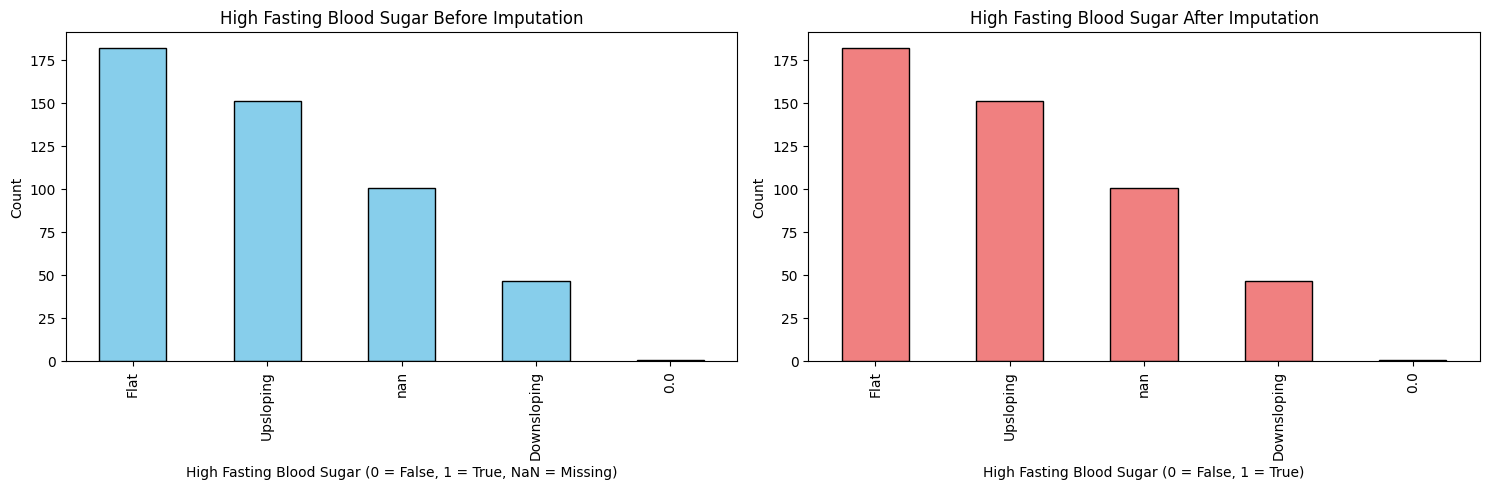

In [16]:
# Perform the imputation process on the selected features
# Step 1: Drop features with a high percentage of missing values
imputation_df = selected_df.drop(columns=['num_major_vessels', 'chest_pain_location'])

# Step 2a: Handling categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Convert categorical columns to numerical for KNN processing
categorical_columns = ['high_fasting_blood_sugar', 'exercise_induced_angina', 'st_slope']

for col in categorical_columns:
    imputation_df[col] = imputation_df[col].astype(str)  # Convert to string to handle NaN values
    le = LabelEncoder()
    imputation_df[col] = le.fit_transform(imputation_df[col])

# Using KNN Imputer for categorical data with medium to high missing values
knn_imputer = KNNImputer(n_neighbors=5)

# Applying KNN Imputer on selected categorical features
imputation_df[categorical_columns] = knn_imputer.fit_transform(imputation_df[categorical_columns])

# Convert back to original categorical labels after KNN Imputation
for col in categorical_columns:
    imputation_df[col] = imputation_df[col].round().astype(int)
    imputation_df[col] = le.inverse_transform(imputation_df[col])

# Visualization of distributions before and after imputation
import matplotlib.pyplot as plt

# For high_fasting_blood_sugar
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
selected_df['st_slope'].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('High Fasting Blood Sugar Before Imputation')
plt.xlabel('High Fasting Blood Sugar (0 = False, 1 = True, NaN = Missing)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
imputation_df['st_slope'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('High Fasting Blood Sugar After Imputation')
plt.xlabel('High Fasting Blood Sugar (0 = False, 1 = True)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

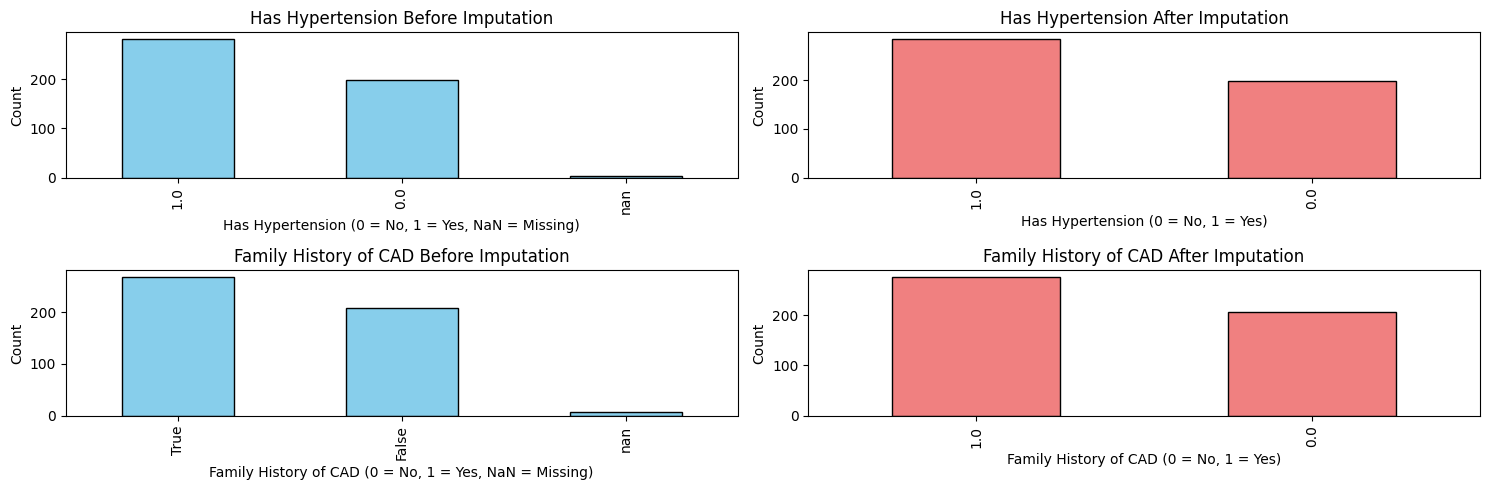

In [17]:
# Applying Mode Imputation for categorical features with a low percentage of missing values
mode_imputer = SimpleImputer(strategy='most_frequent')
imputation_df[['has_hypertension', 'family_history_cad']] = mode_imputer.fit_transform(
    imputation_df[['has_hypertension', 'family_history_cad']]
)

# Visualization of distributions before and after mode imputation
plt.figure(figsize=(15, 5))

# For has_hypertension
plt.subplot(2, 2, 1)
selected_df['has_hypertension'].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Has Hypertension Before Imputation')
plt.xlabel('Has Hypertension (0 = No, 1 = Yes, NaN = Missing)')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
imputation_df['has_hypertension'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Has Hypertension After Imputation')
plt.xlabel('Has Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')

# For family_history_cad
plt.subplot(2, 2, 3)
selected_df['family_history_cad'].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Family History of CAD Before Imputation')
plt.xlabel('Family History of CAD (0 = No, 1 = Yes, NaN = Missing)')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
imputation_df['family_history_cad'].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Family History of CAD After Imputation')
plt.xlabel('Family History of CAD (0 = No, 1 = Yes)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

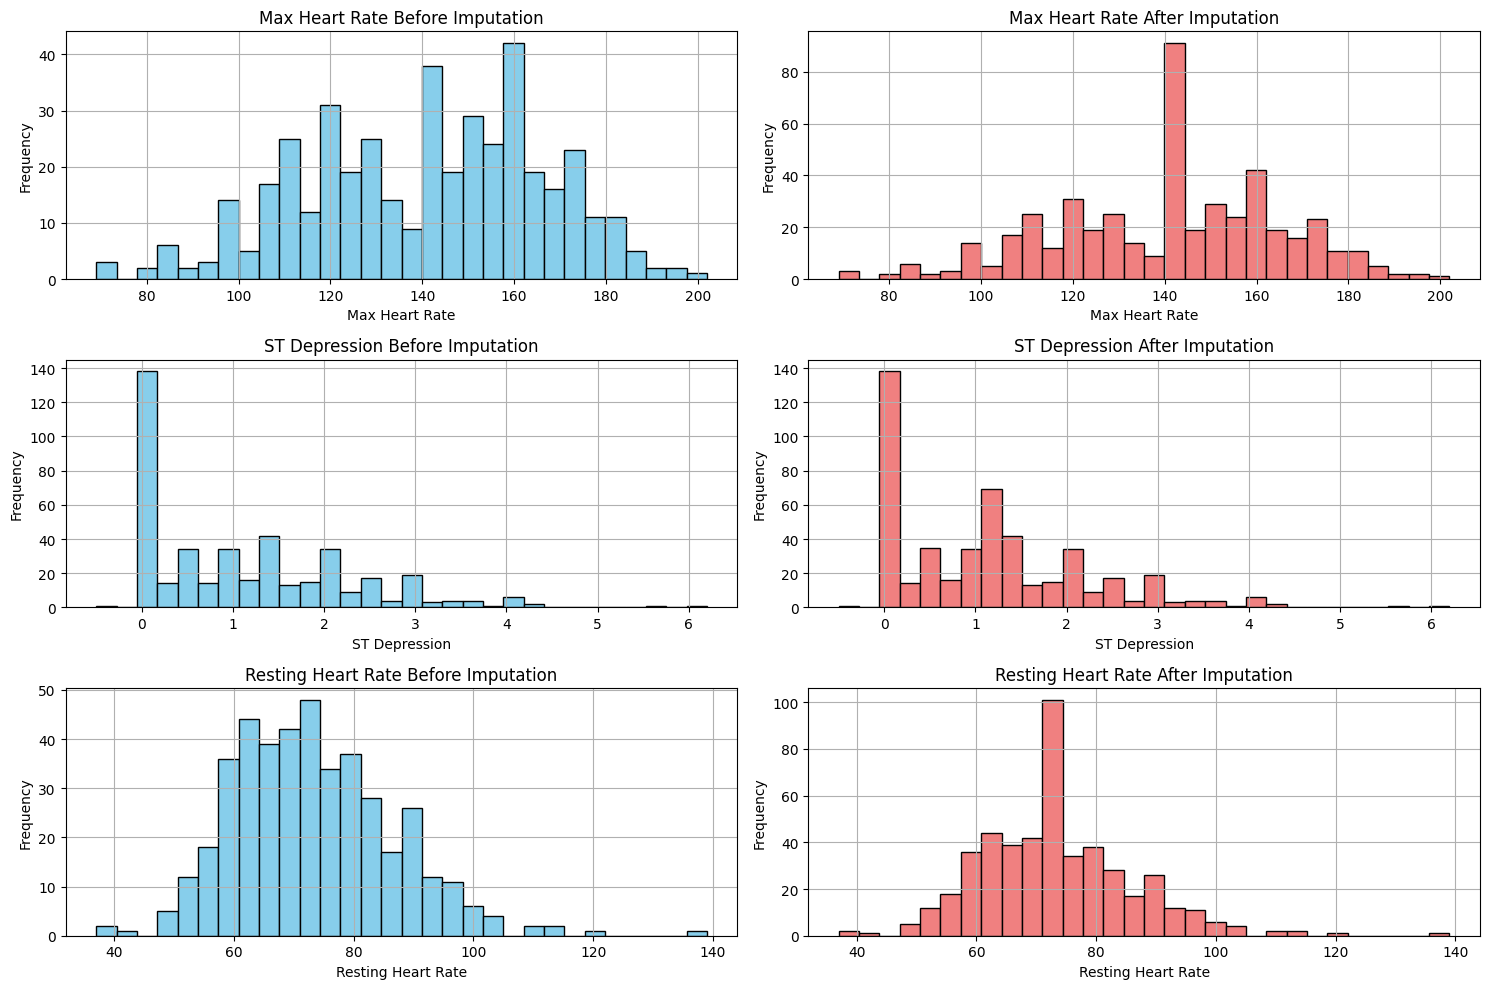

In [18]:
# **Step 2b: Handling numeric data**
# Using KNN Imputer for numerical data with medium to high missing values
knn_numeric_imputer = KNNImputer(n_neighbors=3)
imputation_df[['max_heart_rate', 'st_depression', 'resting_heart_rate']] = knn_numeric_imputer.fit_transform(
    imputation_df[['max_heart_rate', 'st_depression', 'resting_heart_rate']]
)

# Visualization of distributions before and after KNN imputation for numeric data
plt.figure(figsize=(15, 10))

# max_heart_rate before and after imputation
plt.subplot(3, 2, 1)
selected_df['max_heart_rate'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Max Heart Rate Before Imputation')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
imputation_df['max_heart_rate'].hist(bins=30, color='lightcoral', edgecolor='black')
plt.title('Max Heart Rate After Imputation')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')

# st_depression before and after imputation
plt.subplot(3, 2, 3)
selected_df['st_depression'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('ST Depression Before Imputation')
plt.xlabel('ST Depression')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
imputation_df['st_depression'].hist(bins=30, color='lightcoral', edgecolor='black')
plt.title('ST Depression After Imputation')
plt.xlabel('ST Depression')
plt.ylabel('Frequency')

# resting_heart_rate before and after imputation
plt.subplot(3, 2, 5)
selected_df['resting_heart_rate'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Resting Heart Rate Before Imputation')
plt.xlabel('Resting Heart Rate')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
imputation_df['resting_heart_rate'].hist(bins=30, color='lightcoral', edgecolor='black')
plt.title('Resting Heart Rate After Imputation')
plt.xlabel('Resting Heart Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [19]:

# Using Median Imputation for `serum_cholesterol`
median_imputer = SimpleImputer(strategy='median')
imputation_df[['serum_cholesterol']] = median_imputer.fit_transform(imputation_df[['serum_cholesterol']])

# Using Mean Imputation for features with a small percentage of missing values
mean_imputer = SimpleImputer(strategy='mean')
imputation_df[['cigarettes_per_day', 'years_smoking']] = mean_imputer.fit_transform(
    imputation_df[['cigarettes_per_day', 'years_smoking']]
)

### Check for missing values again ###
# Calculate the total number of missing values per feature
missing_values_total = imputation_df.isnull().sum()

# Calculate the percentage of missing values per feature
missing_values_percentage = (missing_values_total / len(imputation_df)) * 100

# Create a DataFrame to display both total and percentage of missing values per feature
missing_values_table = pd.DataFrame({
    'Total Missing': missing_values_total,
    'Percentage Missing (%)': missing_values_percentage
})

# Display the table
print(f"There are {len(imputation_df)} entries in the imputation_df.")
print(missing_values_table)

There are 482 entries in the imputation_df.
                          Total Missing  Percentage Missing (%)
age                                   0                     0.0
gender                                0                     0.0
chest_pain_type                       0                     0.0
serum_cholesterol                     0                     0.0
high_fasting_blood_sugar              0                     0.0
resting_ecg_results                   0                     0.0
max_heart_rate                        0                     0.0
exercise_induced_angina               0                     0.0
st_depression                         0                     0.0
st_slope                              0                     0.0
has_hypertension                      0                     0.0
cigarettes_per_day                    0                     0.0
years_smoking                         0                     0.0
family_history_cad                    0                     

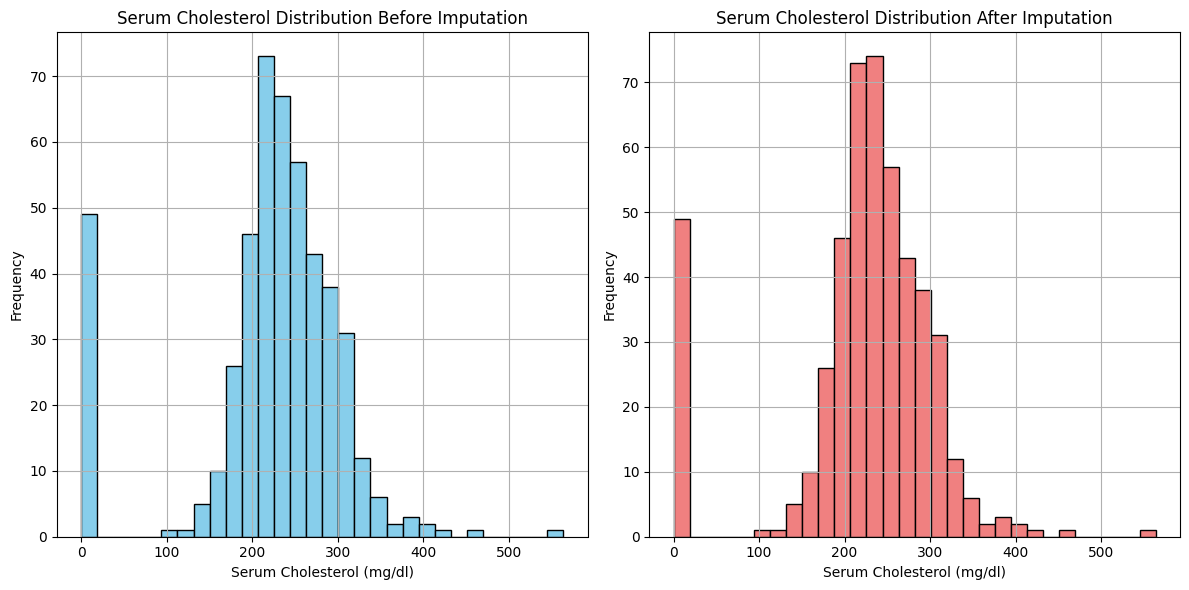

In [20]:
# Create a copy of the column before imputation to visualize
serum_cholesterol_before = selected_df['serum_cholesterol'].copy()

# Imputed data
serum_cholesterol_after = imputation_df['serum_cholesterol'].copy()

# Plotting the distributions
plt.figure(figsize=(12, 6))

# Before Imputation
plt.subplot(1, 2, 1)
serum_cholesterol_before.hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Serum Cholesterol Distribution Before Imputation')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Frequency')

# After Imputation
plt.subplot(1, 2, 2)
serum_cholesterol_after.hist(bins=30, color='lightcoral', edgecolor='black')
plt.title('Serum Cholesterol Distribution After Imputation')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## FInally print the df to check them again

In [21]:
# Perform full descriptive analysis of the dataset to check if all works
drop_nan_df.describe(include='all')

,age,gender,chest_pain_type,serum_cholesterol,high_fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,has_hypertension,cigarettes_per_day,years_smoking,family_history_cad,resting_heart_rate,heart_disease_diagnosis
count,396.000000,396,396,396.000000,396,396,396.000000,396,396.000000,396.0,396.000000,396.000000,396,396.000000,396
unique,NaN,2,4,NaN,2,3,NaN,2,NaN,2.0,NaN,NaN,2,NaN,2
top,NaN,Male,Asymptomatic,NaN,False,Normal,NaN,False,NaN,1.0,NaN,NaN,True,NaN,True
freq,NaN,302,223,NaN,313,187,NaN,228,NaN,241.0,NaN,NaN,230,NaN,217
mean,55.896465,NaN,NaN,228.366162,NaN,NaN,140.916667,NaN,1.086869,NaN,18.224747,17.810606,NaN,73.075758,NaN
std,8.962475,NaN,NaN,81.405749,NaN,NaN,26.153599,NaN,1.131071,NaN,18.516568,16.070950,NaN,13.130863,NaN
min,29.000000,NaN,NaN,0.000000,NaN,NaN,69.000000,NaN,-0.500000,NaN,0.000000,0.000000,NaN,37.000000,NaN
25%,50.000000,NaN,NaN,204.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,64.000000,NaN
50%,57.000000,NaN,NaN,234.500000,NaN,NaN,143.000000,NaN,0.950000,NaN,20.000000,20.000000,NaN,72.000000,NaN
75%,62.000000,NaN,NaN,270.000000,NaN,NaN,161.000000,NaN,1.800000,NaN,30.000000,30.000000,NaN,82.000000,NaN


In [22]:
# Perform full descriptive analysis of the dataset to check if all works
imputation_df.describe(include='all')

,age,gender,chest_pain_type,serum_cholesterol,high_fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,has_hypertension,cigarettes_per_day,years_smoking,family_history_cad,resting_heart_rate,heart_disease_diagnosis
count,482.000000,482,482,482.000000,482,482,482.000000,482,482.000000,482,482.000000,482.000000,482.000000,482.000000,482.000000,482
unique,NaN,2,4,NaN,3,3,NaN,3,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Male,Asymptomatic,NaN,0.0,Normal,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,385,264,NaN,365,218,NaN,242,NaN,182,NaN,NaN,NaN,NaN,NaN,274
mean,56.460581,NaN,NaN,220.690871,NaN,NaN,140.524476,NaN,1.122808,NaN,0.589212,18.882227,18.683871,0.570539,73.294058,NaN
std,8.891556,NaN,NaN,88.906418,NaN,NaN,24.492987,NaN,1.068001,NaN,0.492488,18.066666,16.009517,0.495513,12.656621,NaN
min,29.000000,NaN,NaN,0.000000,NaN,NaN,69.000000,NaN,-0.500000,NaN,0.000000,0.000000,0.000000,0.000000,37.000000,NaN
25%,51.000000,NaN,NaN,202.250000,NaN,NaN,123.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,65.000000,NaN
50%,57.000000,NaN,NaN,233.000000,NaN,NaN,140.524476,NaN,1.126291,NaN,1.000000,20.000000,20.000000,1.000000,73.278037,NaN
75%,63.000000,NaN,NaN,270.000000,NaN,NaN,159.750000,NaN,1.675000,NaN,1.000000,30.000000,30.000000,1.000000,80.000000,NaN


## 5. Save the resulting df to csv files

Save one csv file for each approach:
- 1. All_features_cleaned.csv
- 2. Minimal_features_cleaned.csv

In [23]:
drop_nan_df.to_csv("processed/minimal_data.csv", index=False)
imputation_df.to_csv("processed/imputed_data.csv", index=False)

## Decision basis for using only Cleveland and Long Beach Data
Overview of the results of missing data for each individual dataset.

| **Feature**                | **Cleveland Data (Total Missing)** | **Cleveland Data (%)** | **Hungarian Data (Total Missing)** | **Hungarian Data (%)** | **Switzerland Data (Total Missing)** | **Switzerland Data (%)** | **Long Beach Data (Total Missing)** | **Long Beach Data (%)** |
|----------------------------|-----------------------------------|------------------------|------------------------------------|-------------------------|--------------------------------------|--------------------------|-------------------------------------|-------------------------|
| age                        | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| gender                     | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| chest_pain_type            | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| serum_cholesterol          | 0                                 | 0.00%                  | 23                                 | 7.82%                    | 0                                    | 0.00%                     | 7                                   | 3.5%                    |
| high_fasting_blood_sugar   | 0                                 | 0.00%                  | 8                                  | 2.72%                    | 75                                   | 60.98%                    | 7                                   | 3.5%                    |
| resting_ecg_results        | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 0                                   | 0.0%                    |
| max_heart_rate             | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 53                                  | 26.5%                   |
| exercise_induced_angina    | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 53                                  | 26.5%                   |
| st_depression              | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 6                                    | 4.88%                     | 56                                  | 28.0%                   |
| st_slope                   | 0                                 | 0.00%                  | 190                                | 64.63%                   | 17                                   | 13.82%                    | 101                                 | 50.5%                   |
| num_major_vessels          | 2                                 | 0.71%                  | 290                                | 98.64%                   | 118                                  | 95.93%                    | 198                                 | 99.0%                   |
| chest_pain_location        | 282                               | 100.00%                | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
| has_hypertension           | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 30                                   | 24.39%                    | 3                                   | 1.5%                    |
| cigarettes_per_day         | 5                                 | 1.77%                  | 293                                | 99.66%                   | 112                                  | 91.06%                    | 10                                  | 5.0%                    |
| years_smoking              | 5                                 | 1.77%                  | 294                                | 100.00%                  | 121                                  | 98.37%                    | 12                                  | 6.0%                    |
| family_history_cad         | 0                                 | 0.00%                  | 293                                | 99.66%                   | 121                                  | 98.37%                    | 8                                   | 4.0%                    |
| resting_heart_rate         | 0                                 | 0.00%                  | 1                                  | 0.34%                    | 1                                    | 0.81%                     | 54                                  | 27.0%                   |
| heart_disease_diagnosis    | 0                                 | 0.00%                  | 0                                  | 0.00%                    | 0                                    | 0.00%                     | 0                                   | 0.0%                    |
